In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade "mxnet<2.0.0"
!pip install --pre autogluon

In [ ]:
import pandas as pd
from collections import Counter

# Carico il dataset
path = './drive/MyDrive/Materiale_Pellegrino_personal/AndMal2017/AndMal_Shuffled.csv'
dataset = pd.read_csv(path)

In [2]:
# splitto il dataset in 50% train e 50% test

train = dataset[0:50259].copy()
test = dataset[50259:].copy()

In [3]:
test.iloc[[36889]] # riga che ripeteva le etichette del dataframe

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,multilabel
87148,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [4]:
# elimino la riga e resetto l'indice
test = test.drop(index=36889+50259)
test = test.reset_index(drop=True)

In [5]:
test.iloc[[37822]] # riga che contiene tutti valori NaN

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length 1,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length 2,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,multilabel
37822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test = test.drop(index=37822)
test = test.reset_index(drop=True)

In [7]:
# Tolgo gli spazi dalle etichette delle colonne
train.columns = [x.replace(" ", "") for x in train.columns]
test.columns = [x.replace(" ", "") for x in test.columns]

""" Il dataset presentava all'interno della stessa colonna, per ogni features, valori di tipo diverso.
  Ho distinto quelli interi da quelli continui e ho convertito per uniformarli """

# convert columns to int64 dtype
train = train.astype({"Protocol": int, "FlowDuration": int, 'TotalFwdPackets':int, 'TotalBackwardPackets':int,'TotalLengthofFwdPackets':int, 'TotalLengthofBwdPackets':int,
                'FwdPacketLengthMax':int, 'FwdPacketLengthMin':int, 'BwdPacketLengthMax':int, 'BwdPacketLengthMin':int, 'FwdPSHFlags':int, 'BwdPSHFlags':int,
                'FwdURGFlags':int, 'BwdURGFlags':int, 'MinPacketLength':int, 'MaxPacketLength':int, 'FINFlagCount':int, 'SYNFlagCount':int, 
                'RSTFlagCount':int, 'PSHFlagCount':int, 'ACKFlagCount':int, 'URGFlagCount':int, 'CWEFlagCount':int, 'ECEFlagCount':int, 'Down/UpRatio':int,
                'FwdAvgBytes/Bulk':int, 'FwdAvgPackets/Bulk':int, 'FwdAvgBulkRate':int, 'BwdAvgBytes/Bulk':int, 'BwdAvgPackets/Bulk':int, 'BwdAvgBulkRate':int,
                'SubflowFwdPackets':int, 'SubflowFwdBytes':int, 'SubflowBwdPackets':int, 'SubflowBwdBytes':int, 'Init_Win_bytes_forward':int, 
                'Init_Win_bytes_backward':int, 'act_data_pkt_fwd':int, 'min_seg_size_forward':int})

# convert columns to float64 dtype
train = train.astype({'FwdPacketLengthMean':float, 'FwdPacketLengthStd':float, 'BwdPacketLengthMean':float, 'BwdPacketLengthStd':float, 'FlowBytes/s':float, 
                'FlowPackets/s':float, 'FlowIATMean':float, 'FlowIATStd':float, 'FlowIATMax':float, 'FlowIATMin':float, 'FwdIATTotal':float, 'FwdIATMean':float,
                'FwdIATStd':float, 'FwdIATMax':float, 'FwdIATMin':float, 'BwdIATTotal':float, 'BwdIATMean':float, 'BwdIATStd':float, 'BwdIATMax':float,
                'BwdIATMin':float, 'FwdHeaderLength1':float, 'BwdHeaderLength':float, 'FwdPackets/s':float, 'BwdPackets/s':float, 'PacketLengthMean':float,
                'PacketLengthStd':float, 'PacketLengthVariance':float, 'AveragePacketSize':float, 'AvgFwdSegmentSize':float, 'AvgBwdSegmentSize' :float, 
                'FwdHeaderLength2':float, 'ActiveMean':float, 'ActiveStd':float, 'ActiveMax':float, 'ActiveMin':float, 'IdleMean':float, 'IdleStd':float,
                'IdleMax':float, 'IdleMin':float})

test = test.astype({"Protocol": int, "FlowDuration": int, 'TotalFwdPackets':int, 'TotalBackwardPackets':int,'TotalLengthofFwdPackets':int, 'TotalLengthofBwdPackets':int,
                'FwdPacketLengthMax':int, 'FwdPacketLengthMin':int, 'BwdPacketLengthMax':int, 'BwdPacketLengthMin':int, 'FwdPSHFlags':int, 'BwdPSHFlags':int,
                'FwdURGFlags':int, 'BwdURGFlags':int, 'MinPacketLength':int, 'MaxPacketLength':int, 'FINFlagCount':int, 'SYNFlagCount':int, 
                'RSTFlagCount':int, 'PSHFlagCount':int, 'ACKFlagCount':int, 'URGFlagCount':int, 'CWEFlagCount':int, 'ECEFlagCount':int, 'Down/UpRatio':int,
                'FwdAvgBytes/Bulk':int, 'FwdAvgPackets/Bulk':int, 'FwdAvgBulkRate':int, 'BwdAvgBytes/Bulk':int, 'BwdAvgPackets/Bulk':int, 'BwdAvgBulkRate':int,
                'SubflowFwdPackets':int, 'SubflowFwdBytes':int, 'SubflowBwdPackets':int, 'SubflowBwdBytes':int, 'Init_Win_bytes_forward':int, 
                'Init_Win_bytes_backward':int, 'act_data_pkt_fwd':int, 'min_seg_size_forward':int})

# convert columns to float64 dtype
test = test.astype({'FwdPacketLengthMean':float, 'FwdPacketLengthStd':float, 'BwdPacketLengthMean':float, 'BwdPacketLengthStd':float, 'FlowBytes/s':float, 
                'FlowPackets/s':float, 'FlowIATMean':float, 'FlowIATStd':float, 'FlowIATMax':float, 'FlowIATMin':float, 'FwdIATTotal':float, 'FwdIATMean':float,
                'FwdIATStd':float, 'FwdIATMax':float, 'FwdIATMin':float, 'BwdIATTotal':float, 'BwdIATMean':float, 'BwdIATStd':float, 'BwdIATMax':float,
                'BwdIATMin':float, 'FwdHeaderLength1':float, 'BwdHeaderLength':float, 'FwdPackets/s':float, 'BwdPackets/s':float, 'PacketLengthMean':float,
                'PacketLengthStd':float, 'PacketLengthVariance':float, 'AveragePacketSize':float, 'AvgFwdSegmentSize':float, 'AvgBwdSegmentSize' :float, 
                'FwdHeaderLength2':float, 'ActiveMean':float, 'ActiveStd':float, 'ActiveMax':float, 'ActiveMin':float, 'IdleMean':float, 'IdleStd':float,
                'IdleMax':float, 'IdleMin':float})

In [8]:
train

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,multilabel
0,6,2520,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,793.650794,2.520000e+03,0.000000,2520.0,2520.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,396.825397,396.825397,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,362,1594,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
1,6,2518,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,794.281176,2.518000e+03,0.000000,2518.0,2518.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,397.140588,397.140588,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,383,1593,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,17,154712,1,1,31,86,31,31,31.000000,0.000000,86,86,86.00,0.000000,7.562439e+02,12.927245,1.547120e+05,0.000000,154712.0,154712.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,6.463623,6.463623,31,86,49.333333,31.754265,1008.333333,0,0,0,0,0,0,0,0,1,74.00,31.000000,86.00,32.0,0,0,0,0,0,0,1,31,1,86,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
3,6,29,1,1,55,0,55,55,55.000000,0.000000,0,0,0.00,0.000000,1.896552e+06,68965.517240,2.900000e+01,0.000000,29.0,29.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,32.0,32.0,34482.758620,34482.758620,0,55,36.666667,31.754265,1008.333333,0,1,0,0,1,0,0,0,1,55.00,55.000000,0.00,32.0,0,0,0,0,0,0,1,55,1,0,362,362,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
4,17,299103,1,1,35,85,35,35,35.000000,0.000000,85,85,85.00,0.000000,4.011996e+02,6.686660,2.991030e+05,0.000000,299103.0,299103.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,20.0,20.0,3.343330,3.343330,35,85,51.666667,28.867513,833.333333,0,0,0,0,0,0,0,0,1,77.50,35.000000,85.00,20.0,0,0,0,0,0,0,1,35,1,85,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,6,1143,4,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,3499.562555,3.810000e+02,403.301376,839.0,79.0,1143.0,3.810000e+02,403.301376,839.0,79.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,128.0,0.0,3499.562555,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.00,0.000000,0.00,128.0,0,0,0,0,0,0,4,0,0,0,3105,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
50255,6,3572,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,559.910414,3.572000e+03,0.000000,3572.0,3572.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,279.955207,279.955207,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1

In [9]:
test

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,multilabel
0,17,48937,1,1,33,108,33,33,33.000000,0.000000,108,108,108.000000,0.000000,2881.255492,40.868872,4.893700e+04,0.000,48937.0,48937.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,20.434436,20.434436,33,108,58.000000,43.301270,1875.000000,0,0,0,0,0,0,0,0,1,87.000000,33.000000,108.000000,32.0,0,0,0,0,0,0,1,33,1,108,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
1,17,31894,1,1,36,157,36,36,36.000000,0.000000,157,157,157.000000,0.000000,6051.294914,62.707719,3.189400e+04,0.000,31894.0,31894.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,40.0,31.353860,31.353860,36,157,76.333333,69.859383,4880.333333,0,0,0,0,0,0,0,0,1,114.500000,36.000000,157.000000,40.0,0,0,0,0,0,0,1,36,1,157,-1,-1,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
2,6,12610467,12,10,1245,5203,964,0,103.750000,275.979289,1418,0,520.300000,619.530118,511.321270,1.744582,6.004984e+05,2209738.547,10200000.0,3.0,12600000.0,1.143026e+06,3014328.546,10200000.0,27.0,12600000.0,1.397038e+06,3.330908e+06,10200000.0,3.0,0,0,0,0,392.0,328.0,0.951590,0.792992,0,1418,280.347826,491.785948,241853.419000,0,0,0,1,0,0,0,0,0,293.090909,103.750000,520.300000,392.0,0,0,0,0,0,0,12,1245,10,5203,65535,362,4,32,2399238.0,0.0,2399238.0,2399238.0,10200000.0,0.0,10200000.0,10200000.0,normal
3,6,40272,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,49.662296,4.027200e+04,0.000,40272.0,40272.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,24.831148,24.831148,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32.0,0,0,0,0,0,0,1,0,1,0,349,1638,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
4,6,30054327,19,28,2225,21067,1368,0,117.105263,325.038954,1418,0,752.392857,659.467369,774.996559,1.563835,6.533549e+05,4333459.916,29400000.0,4.0,30100000.0,1.669685e+06,6941149.788,29500000.0,59.0,612875.0,2.269907e+04,4.773537e+04,226020.0,4.0,0,0,0,0,628.0,904.0,0.632189,0.931646,0,1418,485.250000,626.586616,392610.787200,0,0,0,1,0,0,0,0,1,495.574468,117.105263,752.392857,628.0,0,0,0,0,0,0,19,2225,28,21067,65535,383,6,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50257,6,46928458,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.042618,4.690000e+07,0.000,46900000.0,46900000.0,46900000.0,4.690000e+07,0.000,46900000.0,46900000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,0.0,0.042618,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,40.0,0,0,0,0,0,0,2,0,0,0,

In [10]:
# Modifico la colonna multilabel (cioè il target) per renderla numerica e in più conservo un dizionario
from sklearn.preprocessing import LabelEncoder

y_train = LabelEncoder().fit_transform(train['multilabel'])
y_test = LabelEncoder().fit_transform(test['multilabel'])

# sostituisco i valori originari con la codifica precedentemente fatta
target_index = train.columns.get_loc('multilabel')
train.iloc[:, target_index] = y_train
#train['multilabel'] = y_train

# tolgo la variabile target da test 
test = test.drop('multilabel', axis=1)

# Dizionario
target_dict = {'AD_KOODOUS' : 0,
               'RANSOMWARE_SIMPLOCKER' : 1,
               'SCAREWARE_ANDROIDDEFENDER' : 2,
               'SMSMALWARE_FAKEINST' : 3,
               'normal' : 4
               }

In [11]:
train

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,multilabel
0,6,2520,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,793.650794,2.520000e+03,0.000000,2520.0,2520.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,396.825397,396.825397,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,362,1594,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,6,2518,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,794.281176,2.518000e+03,0.000000,2518.0,2518.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,397.140588,397.140588,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0,0,0,0,1,0,1,0,383,1593,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,17,154712,1,1,31,86,31,31,31.000000,0.000000,86,86,86.00,0.000000,7.562439e+02,12.927245,1.547120e+05,0.000000,154712.0,154712.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,6.463623,6.463623,31,86,49.333333,31.754265,1008.333333,0,0,0,0,0,0,0,0,1,74.00,31.000000,86.00,32.0,0,0,0,0,0,0,1,31,1,86,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,6,29,1,1,55,0,55,55,55.000000,0.000000,0,0,0.00,0.000000,1.896552e+06,68965.517240,2.900000e+01,0.000000,29.0,29.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,1,0,0,0,32.0,32.0,34482.758620,34482.758620,0,55,36.666667,31.754265,1008.333333,0,1,0,0,1,0,0,0,1,55.00,55.000000,0.00,32.0,0,0,0,0,0,0,1,55,1,0,362,362,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,17,299103,1,1,35,85,35,35,35.000000,0.000000,85,85,85.00,0.000000,4.011996e+02,6.686660,2.991030e+05,0.000000,299103.0,299103.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,20.0,20.0,3.343330,3.343330,35,85,51.666667,28.867513,833.333333,0,0,0,0,0,0,0,0,1,77.50,35.000000,85.00,20.0,0,0,0,0,0,0,1,35,1,85,-1,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50254,6,1143,4,0,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,3499.562555,3.810000e+02,403.301376,839.0,79.0,1143.0,3.810000e+02,403.301376,839.0,79.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,128.0,0.0,3499.562555,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.00,0.000000,0.00,128.0,0,0,0,0,0,0,4,0,0,0,3105,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
50255,6,3572,1,1,0,0,0,0,0.000000,0.000000,0,0,0.00,0.000000,0.000000e+00,559.910414,3.572000e+03,0.000000,3572.0,3572.0,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0,0,0,0,32.0,32.0,279.955207,279.955207,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.00,0.000000,0.00,32.0,0,0,0

In [12]:
test

,Protocol,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,BwdPacketLengthMax,BwdPacketLengthMin,BwdPacketLengthMean,BwdPacketLengthStd,FlowBytes/s,FlowPackets/s,FlowIATMean,FlowIATStd,FlowIATMax,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATStd,FwdIATMax,FwdIATMin,BwdIATTotal,BwdIATMean,BwdIATStd,BwdIATMax,BwdIATMin,FwdPSHFlags,BwdPSHFlags,FwdURGFlags,BwdURGFlags,FwdHeaderLength1,BwdHeaderLength,FwdPackets/s,BwdPackets/s,MinPacketLength,MaxPacketLength,PacketLengthMean,PacketLengthStd,PacketLengthVariance,FINFlagCount,SYNFlagCount,RSTFlagCount,PSHFlagCount,ACKFlagCount,URGFlagCount,CWEFlagCount,ECEFlagCount,Down/UpRatio,AveragePacketSize,AvgFwdSegmentSize,AvgBwdSegmentSize,FwdHeaderLength2,FwdAvgBytes/Bulk,FwdAvgPackets/Bulk,FwdAvgBulkRate,BwdAvgBytes/Bulk,BwdAvgPackets/Bulk,BwdAvgBulkRate,SubflowFwdPackets,SubflowFwdBytes,SubflowBwdPackets,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
0,17,48937,1,1,33,108,33,33,33.000000,0.000000,108,108,108.000000,0.000000,2881.255492,40.868872,4.893700e+04,0.000,48937.0,48937.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,20.434436,20.434436,33,108,58.000000,43.301270,1875.000000,0,0,0,0,0,0,0,0,1,87.000000,33.000000,108.000000,32.0,0,0,0,0,0,0,1,33,1,108,-1,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,31894,1,1,36,157,36,36,36.000000,0.000000,157,157,157.000000,0.000000,6051.294914,62.707719,3.189400e+04,0.000,31894.0,31894.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,40.0,31.353860,31.353860,36,157,76.333333,69.859383,4880.333333,0,0,0,0,0,0,0,0,1,114.500000,36.000000,157.000000,40.0,0,0,0,0,0,0,1,36,1,157,-1,-1,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,12610467,12,10,1245,5203,964,0,103.750000,275.979289,1418,0,520.300000,619.530118,511.321270,1.744582,6.004984e+05,2209738.547,10200000.0,3.0,12600000.0,1.143026e+06,3014328.546,10200000.0,27.0,12600000.0,1.397038e+06,3.330908e+06,10200000.0,3.0,0,0,0,0,392.0,328.0,0.951590,0.792992,0,1418,280.347826,491.785948,241853.419000,0,0,0,1,0,0,0,0,0,293.090909,103.750000,520.300000,392.0,0,0,0,0,0,0,12,1245,10,5203,65535,362,4,32,2399238.0,0.0,2399238.0,2399238.0,10200000.0,0.0,10200000.0,10200000.0
3,6,40272,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,49.662296,4.027200e+04,0.000,40272.0,40272.0,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32.0,32.0,24.831148,24.831148,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32.0,0,0,0,0,0,0,1,0,1,0,349,1638,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,30054327,19,28,2225,21067,1368,0,117.105263,325.038954,1418,0,752.392857,659.467369,774.996559,1.563835,6.533549e+05,4333459.916,29400000.0,4.0,30100000.0,1.669685e+06,6941149.788,29500000.0,59.0,612875.0,2.269907e+04,4.773537e+04,226020.0,4.0,0,0,0,0,628.0,904.0,0.632189,0.931646,0,1418,485.250000,626.586616,392610.787200,0,0,0,1,0,0,0,0,1,495.574468,117.105263,752.392857,628.0,0,0,0,0,0,0,19,2225,28,21067,65535,383,6,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50257,6,46928458,2,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.042618,4.690000e+07,0.000,46900000.0,46900000.0,46900000.0,4.690000e+07,0.000,46900000.0,46900000.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40.0,0.0,0.042618,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,40.0,0,0,0,0,0,0,2,0,0,0,3103,-1,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50258

### ***MODEL AND TRAINING***

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import random
from autogluon.tabular import TabularPredictor
import mxnet as mx

In [14]:
label = 'multilabel'

train_df = train
test_df = test

print('Number of training samples:', len(train_df))
print('Number of test samples:', len(test_df))

Number of training samples: 50259
Number of test samples: 50262


In [15]:
from autogluon.tabular import TabularPredictor
predictor = TabularPredictor(label=label)

predictor.fit(train_df, hyperparameters='multimodal')

No path specified. Models will be saved in: "AutogluonModels/ag-20210503_111633/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20210503_111633/"
AutoGluon Version:  0.2.1b20210503
Train Data Rows:    50259
Train Data Columns: 78
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [4, 1, 3, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
NumExpr defaulting to 2 threads.
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12455.74 MB
	Train Data (Original)  Memory Usage: 31.36 MB (0.3% of available memory)
	Inferring data type of each feature based on column values. Set f

[1000]	train_set's multi_error: 0.0674428	valid_set's multi_error: 0.0988


	0.9024	 = Validation accuracy score
	90.86s	 = Training runtime
	1.68s	 = Validation runtime
Fitting model: CatBoost ...
	0.8696	 = Validation accuracy score
	4.62s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	0.8796	 = Validation accuracy score
	41.57s	 = Training runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetMXNet ...
	0.8872	 = Validation accuracy score
	626.7s	 = Training runtime
	0.32s	 = Validation runtime
Fitting model: LightGBMLarge ...
	0.9088	 = Validation accuracy score
	115.95s	 = Training runtime
	2.32s	 = Validation runtime
Fitting model: TextNeuralNetwork ...
		No Text Column is found! This is currently not supported by the TextPredictor. You may try to use autogluon.tabular.TabularPredictor.
The inferred column properties of the training data is OrderedDict([('Protocol', 'categorical'), ('FlowDuration', 'numerical'), ('TotalFwdPackets', 'numerical'), ('TotalBackwardPackets', 'numerical'), ('TotalLengthofFwdPackets', 'numer

In [16]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2     0.9092       4.019971  211.943507                0.005645           0.514392            2       True          7
1        LightGBMLarge     0.9088       2.318181  115.948081                2.318181         115.948081            1       True          6
2             LightGBM     0.9068       0.687565   51.519145                0.687565          51.519145            1       True          1
3           LightGBMXT     0.9024       1.681637   90.856257                1.681637          90.856257            1       True          2
4       NeuralNetMXNet     0.8872       0.322054  626.699720                0.322054         626.699720            1       True          5
5              XGBoost     0.8796       0.043690   41.568960                0.043690          41.568960 

{'leaderboard':                  model  score_val  ...  can_infer  fit_order
 0  WeightedEnsemble_L2     0.9092  ...       True          7
 1        LightGBMLarge     0.9088  ...       True          6
 2             LightGBM     0.9068  ...       True          1
 3           LightGBMXT     0.9024  ...       True          2
 4       NeuralNetMXNet     0.8872  ...       True          5
 5              XGBoost     0.8796  ...       True          4
 6             CatBoost     0.8696  ...       True          3
 
 [7 rows x 9 columns],
 'max_stack_level': 2,
 'model_best': 'WeightedEnsemble_L2',
 'model_fit_times': {'CatBoost': 4.62477707862854,
  'LightGBM': 51.519145488739014,
  'LightGBMLarge': 115.9480812549591,
  'LightGBMXT': 90.85625743865967,
  'NeuralNetMXNet': 626.6997203826904,
  'WeightedEnsemble_L2': 0.5143916606903076,
  'XGBoost': 41.56895971298218},
 'model_hyperparams': {'CatBoost': {'allow_writing_files': False,
   'eval_metric': 'Accuracy',
   'iterations': 10000,
   'lear

### ***EVALUATE NeuralNet***

In [17]:
models = predictor.get_model_names()
nn_name = models[4]
nn_name


'NeuralNetMXNet'

In [18]:
y_pred = predictor.predict(test_df, model=nn_name)

In [19]:
y_pred

0        4
1        4
2        4
3        4
4        4
        ..
50257    4
50258    4
50259    4
50260    4
50261    4
Name: multilabel, Length: 50262, dtype: int64

In [20]:
# Introduco nuovamente la colonna target in test
test = test.assign(multilabel=y_test)
predictor.leaderboard(test)

                 model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMLarge    0.909275     0.9088       42.897614       2.318181  115.948081                42.897614                2.318181         115.948081            1       True          6
1  WeightedEnsemble_L2    0.908340     0.9092       80.189916       4.019971  211.943507                 0.010737                0.005645           0.514392            2       True          7
2             LightGBM    0.903247     0.9068       14.743903       0.687565   51.519145                14.743903                0.687565          51.519145            1       True          1
3           LightGBMXT    0.898790     0.9024       37.206284       1.681637   90.856257                37.206284                1.681637          90.856257            1       True          2
4       NeuralNetMXNet    0.882993     0

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,0.909275,0.9088,42.897614,2.318181,115.948081,42.897614,2.318181,115.948081,1,True,6
1,WeightedEnsemble_L2,0.908340,0.9092,80.189916,4.019971,211.943507,0.010737,0.005645,0.514392,2,True,7
2,LightGBM,0.903247,0.9068,14.743903,0.687565,51.519145,14.743903,0.687565,51.519145,1,True,1
3,LightGBMXT,0.898790,0.9024,37.206284,1.681637,90.856257,37.206284,1.681637,90.856257,1,True,2
4,NeuralNetMXNet,0.882993,0.8872,3.367410,0.322054,626.699720,3.367410,0.322054,626.699720,1,True,5
5,XGBoost,0.874040,0.8796,0.894614,0.043690,41.568960,0.894614,0.043690,41.568960,1,True,4
6,CatBoost,0.868529,0.8696,0.075281,0.014509,4.624777,0.075281,0.014509,4.624777,1,True,3


In [21]:
predictor.evaluate(test)

{'accuracy': 0.9083402968445347,
 'balanced_accuracy': 0.43699358233153,
 'mcc': 0.5351318175307661}

### ***EVALUATE NEURALNET***

In [22]:
count_test = []
for i in y_test:
    count_test.append(i)

count_pred = []
for i in y_pred:
    count_pred.append(i)
    
print('Test:', Counter(count_test))
print('Pred:', Counter(count_pred))

Test: Counter({4: 43653, 1: 2201, 0: 1793, 2: 1477, 3: 1138})
Pred: Counter({4: 48818, 2: 453, 0: 429, 1: 412, 3: 150})


In [36]:
# Matrice di confusione, accuracy, classification_report
from sklearn.metrics import *

# y_test è la variabile che contiene i valori effettivi
# y_pred contiene i valori predetti dal modello

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [24]:
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[[48339   130]
  [ 1494   299]]

 [[47937   124]
  [ 1913   288]]

 [[48598   187]
  [ 1211   266]]

 [[49036    88]
  [ 1076    62]]

 [[ 1257  5352]
  [  187 43466]]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass display_labels={'A_S': 0, 'R_S': 1, 'S_A': 2, 'SMS_F': 3, 'normal': 4} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


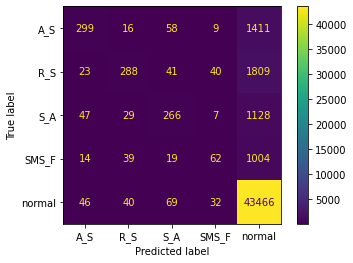

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

mcm_target_dict = {'A_S' : 0,
               'R_S' : 1,
               'S_A' : 2,
               'SMS_F' : 3,
               'normal' : 4
               }

disp = ConfusionMatrixDisplay(cm, mcm_target_dict)
disp.plot()

In [34]:
FP = cm.sum (axis = 0) - np.diag (cm) 
FN = cm.sum (axis = 1) - np.diag (cm) 
TP = np.diag (cm) 
TN = cm.sum () - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [35]:
ACC = (TP+TN)/(TP+FP+FN+TN)
ACC

array([0.96768931, 0.95947236, 0.97218575, 0.97684135, 0.88979746])

In [37]:
print(mcc)

0.3296170114785844


In [27]:
print(acc)

0.8829931160717839


In [28]:
print(report)

              precision    recall  f1-score   support

           0       0.70      0.17      0.27      1793
           1       0.70      0.13      0.22      2201
           2       0.59      0.18      0.28      1477
           3       0.41      0.05      0.10      1138
           4       0.89      1.00      0.94     43653

    accuracy                           0.88     50262
   macro avg       0.66      0.31      0.36     50262
weighted avg       0.86      0.88      0.85     50262

